
# Global Solutions 2024.2 - Parte 3: Statistical Computing with R (SCR)

Este notebook contém a análise exploratória de dados tarifários fornecidos pela ANEEL. O objetivo é identificar padrões tarifários que podem ser utilizados para otimizar o consumo de energia e propor estratégias de eficiência energética.

---

## Etapas do Notebook
1. **Carregamento e Limpeza de Dados**
2. **Análise Estatística**
3. **Visualização dos Dados**
4. **Conclusões**


Nesta etapa, carregamos o conjunto de dados de tarifas e realizamos a limpeza para garantir a consistência dos valores numéricos nas colunas de TUSD e TE.

## Carregamento e Limpeza de Dados

Nesta etapa, carregamos o conjunto de dados de tarifas e realizamos a limpeza para garantir a consistência dos valores numéricos nas colunas de TUSD e TE.

In [1]:
import pandas as pd

# Carregar o conjunto de dados de tarifas
file_path = "tarifas-homologadas-distribuidoras-energia-eletrica.csv"
data = pd.read_csv(file_path, sep=';', encoding='latin1')

# Ajustar os valores das colunas TUSD e TE para formato numérico
# Removemos vírgulas e convertemos para float
data['VlrTUSD'] = pd.to_numeric(data['VlrTUSD'].str.replace(',', '.').str.strip(), errors='coerce')
data['VlrTE'] = pd.to_numeric(data['VlrTE'].str.replace(',', '.').str.strip(), errors='coerce')

# Exibir informações básicas sobre o conjunto de dados
print("### Informações Gerais sobre o Conjunto de Dados ###")
data.info()

# Visualizar as primeiras linhas do conjunto de dados para validação
print("\n### Primeiras Linhas do Conjunto de Dados ###")
data.head()


### Informações Gerais sobre o Conjunto de Dados ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259342 entries, 0 to 259341
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DatGeracaoConjuntoDados  259342 non-null  object 
 1   DscREH                   259342 non-null  object 
 2   SigAgente                259342 non-null  object 
 3   NumCNPJDistribuidora     259342 non-null  int64  
 4   DatInicioVigencia        259342 non-null  object 
 5   DatFimVigencia           259342 non-null  object 
 6   DscBaseTarifaria         259342 non-null  object 
 7   DscSubGrupo              259342 non-null  object 
 8   DscModalidadeTarifaria   259342 non-null  object 
 9   DscClasse                259342 non-null  object 
 10  DscSubClasse             259342 non-null  object 
 11  DscDetalhe               259342 non-null  object 
 12  NomPostoTarifario        259342 non-null  object 
 13  DscUni

,DatGeracaoConjuntoDados,DscREH,SigAgente,NumCNPJDistribuidora,DatInicioVigencia,DatFimVigencia,DscBaseTarifaria,DscSubGrupo,DscModalidadeTarifaria,DscClasse,DscSubClasse,DscDetalhe,NomPostoTarifario,DscUnidadeTerciaria,SigAgenteAcessante,VlrTUSD,VlrTE
0,2024-11-14,"RESOLUÇÃO HOMOLOGATÓRIA Nº 0.937, DE 2 DE FEVE...",CPFL JAGUARI,53859112000169,2010-02-03,2011-02-02,Tarifa de Aplicação,A2,Azul,Não se aplica,Não se aplica,APE,Fora ponta,kW,Não se aplica,1.85,0.0
1,2024-11-14,"RESOLUÇÃO HOMOLOGATÓRIA Nº 0.937, DE 2 DE FEVE...",CPFL JAGUARI,53859112000169,2010-02-03,2011-02-02,Base Econômica,A2,Azul,Não se aplica,Não se aplica,APE,Fora ponta,kW,Não se aplica,1.85,0.0
2,2024-11-14,"RESOLUÇÃO HOMOLOGATÓRIA Nº 0.937, DE 2 DE FEVE...",CPFL JAGUARI,53859112000169,2010-02-03,2011-02-02,Base Econômica,A2,Azul,Não se aplica,Não se aplica,APE,Ponta,kW,Não se aplica,19.05,0.0
3,2024-11-14,"RESOLUÇÃO HOMOLOGATÓRIA Nº 0.937, DE 2 DE FEVE...",CPFL JAGUARI,53859112000169,2010-02-03,2011-02-02,Tarifa de Aplicação,A2,Azul,Não se aplica,Não se aplica,APE,Ponta,kW,Não se aplica,20.64,0.0
4,2024-11-14,"RESOLUÇÃO HOMOLOGATÓRIA Nº 0.937, DE 2 DE FEVE...",CPFL JAGUARI,53859112000169,2010-02-03,2011-02-02,Base Econômica,A2,Azul,Não se aplica,Não se aplica,Não se aplica,Fora ponta,kW,Não se aplica,1.85,0.0


## Análise Estatística

Aqui calculamos as estatísticas descritivas como média e desvio padrão das tarifas agrupadas por distribuidoras, modalidades tarifárias e classes de consumo.

In [2]:
# Agrupar os dados por distribuidora e calcular estatísticas descritivas (média e desvio padrão)
estatisticas_distribuidora = data.groupby('SigAgente')[['VlrTUSD', 'VlrTE']].agg(['mean', 'std']).reset_index()
estatisticas_distribuidora.columns = ['Distribuidora', 'TUSD_Média', 'TUSD_Desvio', 'TE_Média', 'TE_Desvio']

# Repetir o processo para modalidades tarifárias
estatisticas_modalidade = data.groupby('DscModalidadeTarifaria')[['VlrTUSD', 'VlrTE']].agg(['mean', 'std']).reset_index()
estatisticas_modalidade.columns = ['Modalidade Tarifária', 'TUSD_Média', 'TUSD_Desvio', 'TE_Média', 'TE_Desvio']

# Repetir o processo para classes de consumo
estatisticas_classe = data.groupby('DscClasse')[['VlrTUSD', 'VlrTE']].agg(['mean', 'std']).reset_index()
estatisticas_classe.columns = ['Classe de Consumo', 'TUSD_Média', 'TUSD_Desvio', 'TE_Média', 'TE_Desvio']

# Exibir as tabelas com estatísticas descritivas
# Essas tabelas ajudam a entender variações por grupo
estatisticas_distribuidora.head(), estatisticas_modalidade.head(), estatisticas_classe.head()


(  Distribuidora  TUSD_Média  TUSD_Desvio    TE_Média   TE_Desvio
 0           AME  263.026642   316.150975  135.773200  144.464864
 1     Boa Vista  221.559277   276.118607  137.491898  149.904765
 2  CASTRO - DIS  235.433925   218.564586  101.639506   96.259376
 3           CEA  248.822139   330.297452   90.824799   96.927651
 4        CEDRAP  438.425195   550.202024   90.034792   93.637797,
   Modalidade Tarifária  TUSD_Média  TUSD_Desvio    TE_Média   TE_Desvio
 0                 Azul   46.682806  1481.433093   62.260770  115.791151
 1   Azul ABRACE CATIVO   51.795572    30.620712    0.000000    0.000000
 2    Azul ABRACE LIVRE   46.520398    26.139095    0.000000    0.000000
 3               Branca  517.046967   425.080610  150.243092  119.608894
 4         Convencional  226.960479   177.134844  122.734090   91.023829,
     Classe de Consumo  TUSD_Média  TUSD_Desvio    TE_Média   TE_Desvio
 0  Iluminação pública  196.315650    98.513106   93.761228   52.568525
 1       Não se apli

## Visualização dos Dados

As visualizações mostram padrões tarifários médios entre distribuidoras, modalidades tarifárias e classes de consumo, ajudando a identificar oportunidades de eficiência energética.

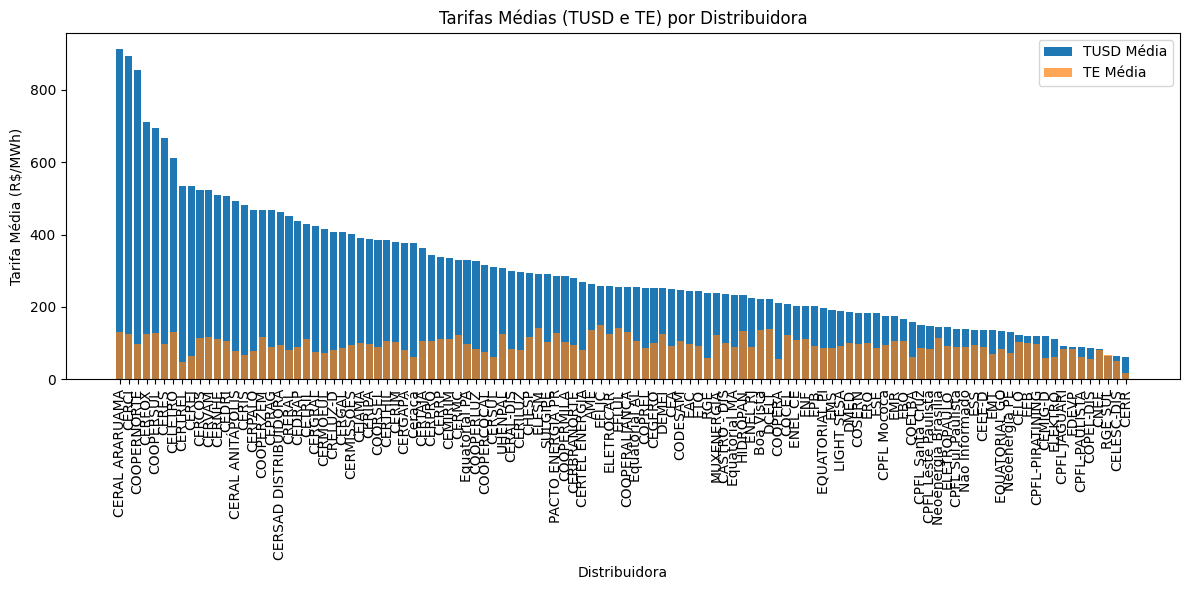

### Gráfico 1 Explicação ###
Este gráfico mostra as tarifas médias de TUSD e TE para cada distribuidora. Observe que algumas distribuidoras possuem valores significativamente mais altos,
indicando possíveis custos operacionais maiores ou diferenças regionais no sistema de distribuição de energia.


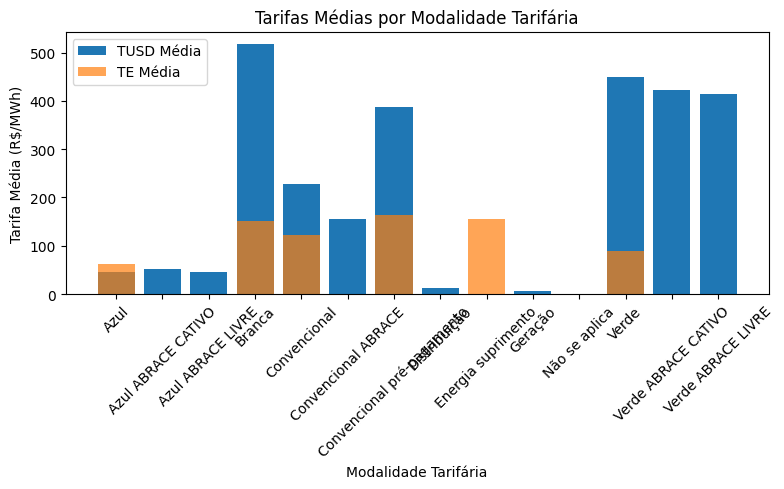

### Gráfico 2 Explicação ###
Este gráfico ilustra as diferenças tarifárias entre modalidades como Azul e Verde. As modalidades horossazonais tendem a apresentar variações significativas,
sendo ideais para consumidores que podem ajustar o consumo fora dos horários de pico.


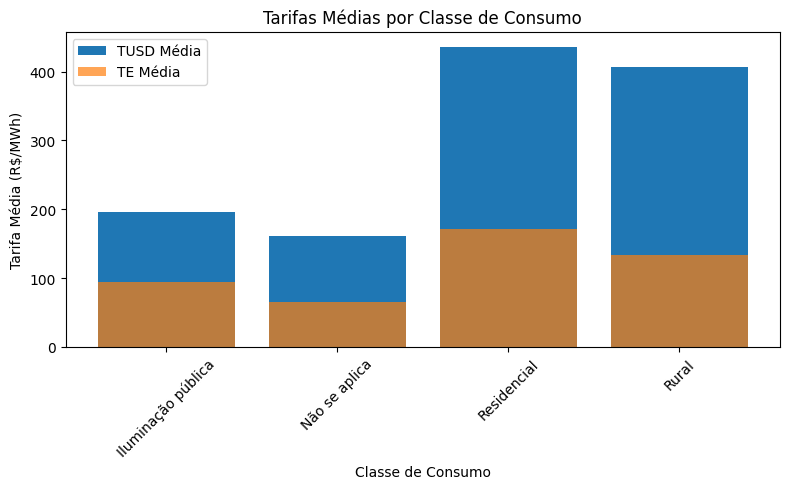

### Gráfico 3 Explicação ###
Este gráfico destaca as tarifas médias para diferentes classes de consumidores. A classe Residencial apresenta as tarifas mais altas,
indicando maior impacto financeiro e potencial de otimização com soluções de eficiência energética.


In [6]:
import matplotlib.pyplot as plt

# Gráfico 1: Tarifas médias por distribuidora
# Exibimos as tarifas médias de TUSD e TE para cada distribuidora, destacando as variações regionais.

plt.figure(figsize=(12, 6))
estatisticas_distribuidora_sorted = estatisticas_distribuidora.sort_values('TUSD_Média', ascending=False)
plt.bar(estatisticas_distribuidora_sorted['Distribuidora'], estatisticas_distribuidora_sorted['TUSD_Média'], label="TUSD Média")
plt.bar(estatisticas_distribuidora_sorted['Distribuidora'], estatisticas_distribuidora_sorted['TE_Média'], alpha=0.7, label="TE Média")
plt.xticks(rotation=90)
plt.xlabel('Distribuidora')
plt.ylabel('Tarifa Média (R$/MWh)')
plt.title('Tarifas Médias (TUSD e TE) por Distribuidora')
plt.legend()
plt.tight_layout()
plt.show()

print("### Gráfico 1 Explicação ###")
print("Este gráfico mostra as tarifas médias de TUSD e TE para cada distribuidora. Observe que algumas distribuidoras possuem valores significativamente mais altos,")
print("indicando possíveis custos operacionais maiores ou diferenças regionais no sistema de distribuição de energia.")

# Gráfico 2: Tarifas médias por modalidade tarifária
# Este gráfico compara as tarifas médias entre diferentes modalidades tarifárias, como Azul e Verde.

plt.figure(figsize=(8, 5))
plt.bar(estatisticas_modalidade['Modalidade Tarifária'], estatisticas_modalidade['TUSD_Média'], label="TUSD Média")
plt.bar(estatisticas_modalidade['Modalidade Tarifária'], estatisticas_modalidade['TE_Média'], alpha=0.7, label="TE Média")
plt.xticks(rotation=45)
plt.xlabel('Modalidade Tarifária')
plt.ylabel('Tarifa Média (R$/MWh)')
plt.title('Tarifas Médias por Modalidade Tarifária')
plt.legend()
plt.tight_layout()
plt.show()

print("### Gráfico 2 Explicação ###")
print("Este gráfico ilustra as diferenças tarifárias entre modalidades como Azul e Verde. As modalidades horossazonais tendem a apresentar variações significativas,")
print("sendo ideais para consumidores que podem ajustar o consumo fora dos horários de pico.")


# Gráfico 3: Tarifas médias por classe de consumo
# Compara as tarifas médias de TUSD e TE para diferentes classes de consumidores, como Residencial e Rural.

plt.figure(figsize=(8, 5))
plt.bar(estatisticas_classe['Classe de Consumo'], estatisticas_classe['TUSD_Média'], label="TUSD Média")
plt.bar(estatisticas_classe['Classe de Consumo'], estatisticas_classe['TE_Média'], alpha=0.7, label="TE Média")
plt.xticks(rotation=45)
plt.xlabel('Classe de Consumo')
plt.ylabel('Tarifa Média (R$/MWh)')
plt.title('Tarifas Médias por Classe de Consumo')
plt.legend()
plt.tight_layout()
plt.show()

print("### Gráfico 3 Explicação ###")
print("Este gráfico destaca as tarifas médias para diferentes classes de consumidores. A classe Residencial apresenta as tarifas mais altas,")
print("indicando maior impacto financeiro e potencial de otimização com soluções de eficiência energética.")



## Conclusões

1. **Distribuidoras**: Há grande variação nas tarifas médias entre distribuidoras. Regiões atendidas por distribuidoras com tarifas elevadas são candidatas para adoção de tecnologias de eficiência energética.
2. **Modalidades Tarifárias**: Modalidades como Azul apresentam tarifas mais elevadas. Consumidores podem se beneficiar de ajustes no consumo durante horários de menor custo.
3. **Classes de Consumo**: A classe Residencial tem as tarifas mais altas, demonstrando potencial para maior impacto econômico ao implementar soluções de otimização.

Essas análises podem ser usadas para desenvolver sistemas que priorizem regiões e modalidades de maior custo, incentivando a transição para práticas mais sustentáveis.


Essas conclusões ajudam a priorizar regiões e classes consumidoras para estratégias de otimização energética.